In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding = 'ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.shape

(5572, 5)

In [8]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1,inplace = True)

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.rename(columns = {'v1':'Label','v2':'Messsage'}, inplace = True)

In [11]:
df.head()

,Label,Messsage
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.Label.value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [13]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [14]:
import re

def cleaning_text(text):
  text = re.sub('[^a-zA-Z]', ' ', text)
  text = re.sub('<.*?>','',text)
  text = re.sub('[^\w\d\s]','',text)
  text = re.sub('^\s+|\s+?$','',text)
  return text

In [15]:
clean_messages = df['Messsage'].apply(func=cleaning_text)
clean_messages.head()

0    Go until jurong point  crazy   Available only ...
1                           Ok lar    Joking wif u oni
2    Free entry in   a wkly comp to win FA Cup fina...
3       U dun say so early hor    U c already then say
4    Nah I don t think he goes to usf  he lives aro...
Name: Messsage, dtype: object

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words("english")
clean_messages =clean_messages.apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords))
clean_messages

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry wkly comp win FA Cup final tkts st ...
3                     U dun say early hor U c already say
4                Nah I think goes usf lives around though
                              ...                        
5567    This nd time tried contact u U Pound prize cla...
5568                       Will b going esplanade fr home
5569                             Pity mood So suggestions
5570    The guy bitching I acted like interested buyin...
5571                                   Rofl Its true name
Name: Messsage, Length: 5572, dtype: object

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [20]:
from nltk.stem import WordNetLemmatizer

wn_lemmatizer = WordNetLemmatizer()
clean_messages = clean_messages.apply(lambda x: ' '.join(wn_lemmatizer.lemmatize(word) for word in x.split()))

clean_messages

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry wkly comp win FA Cup final tkts st ...
3                     U dun say early hor U c already say
4                   Nah I think go usf life around though
                              ...                        
5567    This nd time tried contact u U Pound prize cla...
5568                       Will b going esplanade fr home
5569                              Pity mood So suggestion
5570    The guy bitching I acted like interested buyin...
5571                                   Rofl Its true name
Name: Messsage, Length: 5572, dtype: object

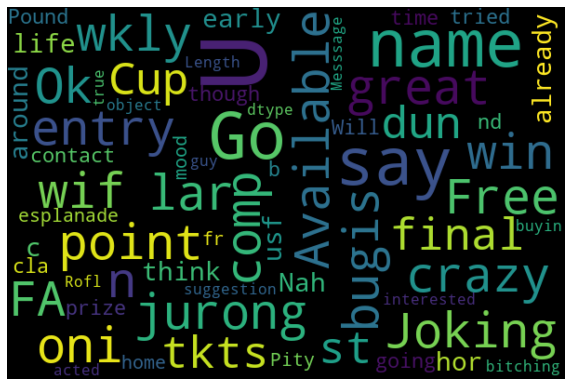

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(str(clean_messages))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
labels = df['Label']

In [23]:
labels = pd.get_dummies(labels, columns=['Label'])

In [24]:
labels.drop(['ham'], axis=1,inplace = True)

In [25]:
labels.head()

,spam
0,0
1,0
2,1
3,0
4,0


In [26]:
labels.rename(columns = {'spam':'Label'}, inplace = True)

In [27]:
labels

,Label
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(clean_messages, labels, test_size=0.20, random_state=19)

In [29]:
print(f'shape of x_train :{x_train.shape}')
print(f'shape of x_test :{x_test.shape}')
print(f'shape of y_train :{y_train.shape}')
print(f'shape of y_test :{y_test.shape}')

shape of x_train :(4457,)
shape of x_test :(1115,)
shape of y_train :(4457, 1)
shape of y_test :(1115, 1)


In [30]:
y_train = np.squeeze(y_train)

In [31]:
y_test = np.squeeze(y_test)

In [32]:
y_test.head()

4209    0
5466    1
2455    0
2513    1
80      0
Name: Label, dtype: uint8

In [33]:
print(f'shape of y_train :{y_train.shape}')
print(f'shape of y_test :{y_test.shape}')

shape of y_train :(4457,)
shape of y_test :(1115,)


In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [35]:
tokenize = Tokenizer(num_words=10000)

tokenize.fit_on_texts(x_train)

x_train = tokenize.texts_to_sequences(x_train)
x_test = tokenize.texts_to_sequences(x_test)

In [36]:
print(tokenize.word_index)

{'i': 1, 'u': 2, 'call': 3, 'get': 4, 'ur': 5, 'you': 6, 'gt': 7, 'go': 8, 'lt': 9, 'ok': 10, 'day': 11, 'know': 12, 'free': 13, 'come': 14, 'time': 15, 'good': 16, 'got': 17, 'like': 18, 'no': 19, 'love': 20, 'want': 21, 'text': 22, 'send': 23, 'one': 24, 'p': 25, 'n': 26, 'need': 27, 'txt': 28, 'r': 29, 'going': 30, 'today': 31, 'lor': 32, 'how': 33, 'sorry': 34, 'still': 35, 'home': 36, 'k': 37, 'back': 38, 'mobile': 39, 'stop': 40, 'but': 41, 'take': 42, 'see': 43, 'we': 44, 'da': 45, 'reply': 46, 'tell': 47, 'if': 48, 'dont': 49, 'think': 50, 'hi': 51, 'week': 52, 'new': 53, 'phone': 54, 'night': 55, 'later': 56, 'c': 57, 'it': 58, 'so': 59, 'pls': 60, 'just': 61, 'do': 62, 'what': 63, 'msg': 64, 'please': 65, 'make': 66, 'dear': 67, 'the': 68, 'thing': 69, 'my': 70, 'hope': 71, 'claim': 72, 'say': 73, 'well': 74, 'b': 75, 'min': 76, 'great': 77, 'work': 78, 'give': 79, 'much': 80, 'hey': 81, 'number': 82, 'and': 83, 'a': 84, 'way': 85, 'co': 86, 'have': 87, 'wat': 88, 'your': 89,

In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
pad_length = 100

size = len(tokenize.word_index) + 1
print(size)

6526


In [39]:
x_train = pad_sequences(x_train, padding='pre', maxlen=pad_length)
x_test = pad_sequences(x_test, padding='pre', maxlen=pad_length)

print(x_train,'\n')
print(x_test)

[[   0    0    0 ...   62   77  206]
 [   0    0    0 ... 3237   22  832]
 [   0    0    0 ...   14   38   20]
 ...
 [   0    0    0 ... 1151    5  253]
 [   0    0    0 ...  749 1096  749]
 [   0    0    0 ...   56  129  946]] 

[[   0    0    0 ...   90 4228 5711]
 [   0    0    0 ...   57   57  432]
 [   0    0    0 ...    4  159 4814]
 ...
 [   0    0    0 ... 3164   35   88]
 [   0    0    0 ...    0    2    3]
 [   0    0    0 ...  296    2  469]]


In [40]:
from imblearn.over_sampling import SMOTE

x_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)

In [41]:
x_resampled

array([[   0,    0,    0, ...,   62,   77,  206],
       [   0,    0,    0, ..., 3237,   22,  832],
       [   0,    0,    0, ...,   14,   38,   20],
       ...,
       [   0,    0,    0, ...,  418,  342,  221],
       [   0,    0,    0, ...,  771,   17,  683],
       [   0,    0,    0, ...,  668,   29,  402]], dtype=int32)

In [42]:
print(f'shape of x_resampled :{x_resampled.shape}')

print(f'shape of y_resampled :{y_resampled.shape}')


shape of x_resampled :(7754, 100)
shape of y_resampled :(7754,)


In [43]:
!wget -N http://nlp.stanford.edu/data/glove.6B.zip

--2023-01-04 12:17:10--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-01-04 12:17:10--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-01-04 12:17:10--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [44]:
!unzip -n glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [45]:
glove_100 = pd.read_csv('glove.6B.100d.txt', sep=" ", quoting=3, header=None, index_col=0)

In [46]:
glove_100.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,,,,,,,,,,,,,,,,,,,,,
the,-0.038194,-0.244870,0.72812,-0.399610,0.083172,0.043953,-0.391410,0.334400,-0.57545,0.087459,...,0.016215,-0.017099,-0.389840,0.87424,-0.72569,-0.51058,-0.520280,-0.14590,0.82780,0.270620
",",-0.107670,0.110530,0.59812,-0.543610,0.673960,0.106630,0.038867,0.354810,0.06351,-0.094189,...,0.349510,-0.722600,0.375490,0.44410,-0.99059,0.61214,-0.351110,-0.83155,0.45293,0.082577
.,-0.339790,0.209410,0.46348,-0.647920,-0.383770,0.038034,0.171270,0.159780,0.46619,-0.019169,...,-0.063351,-0.674120,-0.068895,0.53604,-0.87773,0.31802,-0.392420,-0.23394,0.47298,-0.028803
of,-0.152900,-0.242790,0.89837,0.169960,0.535160,0.487840,-0.588260,-0.179820,-1.35810,0.425410,...,0.187120,-0.018488,-0.267570,0.72700,-0.59363,-0.34839,-0.560940,-0.59100,1.00390,0.206640
to,-0.189700,0.050024,0.19084,-0.049184,-0.089737,0.210060,-0.549520,0.098377,-0.20135,0.342410,...,-0.131340,0.058617,-0.318690,-0.61419,-0.62393,-0.41548,-0.038175,-0.39804,0.47647,-0.159830


In [47]:
embeddings_dictionary = {key: val.values for key, val in glove_100.T.items()}

In [48]:
embeddings_dictionary['president']

array([-0.064549, -0.13812 ,  0.50017 ,  0.41434 ,  0.45832 , -0.048331,
       -0.21651 ,  0.34987 , -0.83235 , -0.62282 , -0.40099 , -0.31978 ,
        0.42928 , -0.026035, -0.16171 , -0.32513 ,  0.77604 , -0.39852 ,
       -0.67013 , -0.55876 , -0.39863 , -0.28143 ,  0.68614 ,  0.29229 ,
       -0.7146  ,  0.36995 , -0.45309 , -0.23193 ,  0.76916 , -0.031589,
        1.0603  ,  1.5446  , -0.13272 ,  0.33701 , -0.97561 ,  0.73617 ,
        0.60841 ,  0.558   , -0.39274 ,  0.1121  , -1.0474  , -0.03692 ,
        0.99908 , -0.044925, -0.41186 ,  0.19605 ,  0.093281, -0.59623 ,
       -0.60765 , -0.4742  , -0.30162 , -0.70128 , -0.20055 ,  0.99519 ,
        0.20088 , -2.5636  , -0.14627 ,  0.77824 ,  1.4913  ,  0.29724 ,
       -0.12084 , -0.060082,  0.079881, -0.38348 ,  0.41371 , -0.41284 ,
        0.61702 ,  1.1316  , -0.047434,  0.2848  ,  0.57694 , -0.45501 ,
       -0.76359 , -1.1659  ,  0.068946, -0.22498 ,  0.18691 ,  0.64142 ,
       -1.7505  , -0.091248,  0.85848 , -0.52203 , 

In [49]:
embeddings_matrix = np.zeros((size, 100))

for word, index in tokenize.word_index.items():
  emb_vector = embeddings_dictionary.get(word)
  if emb_vector is not None:
    embeddings_matrix[index] = emb_vector
     


In [50]:
embeddings_matrix.shape

(6526, 100)

In [51]:
embeddings_matrix[0].shape

(100,)

In [52]:
embeddings_matrix[:5]

array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = size, output_dim = 100,
                              weights=[embeddings_matrix],input_length=pad_length,
                              trainable=False),
    tf.keras.layers.LSTM(128,activation = 'tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(6, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2023-01-04 12:20:37.177843: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [54]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          652600    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 774,181
Trainable params: 121,581
Non-trainable params: 652,600
____________________________________________

In [56]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [57]:
history = model.fit(x_resampled,y_resampled,batch_size=64,epochs=50,validation_split=0.20,callbacks=[callbacks]) 

2023-01-04 12:20:38.377393: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
97/97 [==============================] - 17s 145ms/step - loss: 0.3852 - accuracy: 0.8409 - val_loss: 0.4643 - val_accuracy: 0.8117
Epoch 2/50
97/97 [==============================] - 12s 125ms/step - loss: 0.2609 - accuracy: 0.9052 - val_loss: 0.2936 - val_accuracy: 0.9014
Epoch 3/50
97/97 [==============================] - 13s 133ms/step - loss: 0.2237 - accuracy: 0.9218 - val_loss: 0.4525 - val_accuracy: 0.8195
Epoch 4/50
97/97 [==============================] - 13s 136ms/step - loss: 0.1906 - accuracy: 0.9365 - val_loss: 0.2622 - val_accuracy: 0.9052
Epoch 5/50
97/97 [==============================] - 13s 130ms/step - loss: 0.1644 - accuracy: 0.9471 - val_loss: 0.2455 - val_accuracy: 0.9162
Epoch 6/50
97/97 [==============================] - 13s 137ms/step - loss: 0.1491 - accuracy: 0.9528 - val_loss: 0.2820 - val_accuracy: 0.9001
Epoch 7/50
97/97 [==============================] - 13s 132ms/step - loss: 0.1296 - accuracy: 0.9626 - val_loss: 0.3857 - val_accuracy: 0.8743

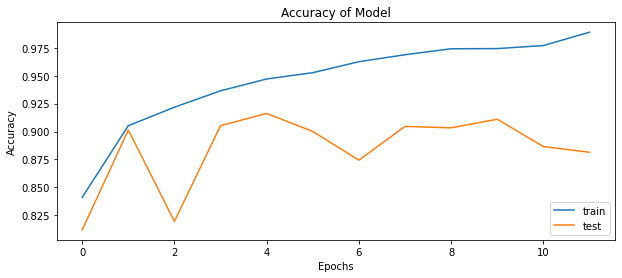

In [58]:
fig = plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

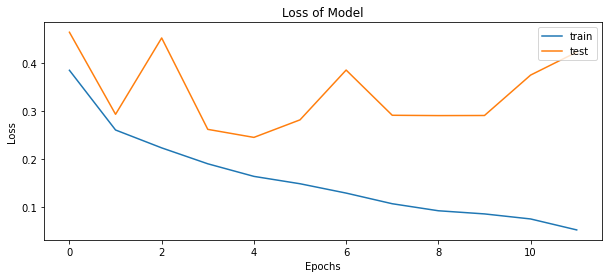

In [59]:
fig = plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
